# 문제1. DataFrame Index

#### (1) 아래 코드를 실행하고, df에 ['진수','상연','언지','수진','본인이름']으로 구성된 '이름'열을 생성해주세요.

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df=titanic.loc[0:4,'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [2]:
df['이름'] = ['진수','상연','언지','수진','성현']
df

,survived,pclass,sex,age,이름
0,0,3,male,22.0,진수
1,1,1,female,38.0,상연
2,1,3,female,26.0,언지
3,1,1,female,35.0,수진
4,0,3,male,35.0,성현


#### (2) '이름' 열을 Index로하는 DataFrame ndf를 생성해주세요.

In [3]:
ndf = df.set_index('이름')
ndf

,survived,pclass,sex,age
이름,,,,
진수,0,3,male,22.0
상연,1,1,female,38.0
언지,1,3,female,26.0
수진,1,1,female,35.0
성현,0,3,male,35.0


# 문제2.  데이터프레임 핸들링

#### (1) diamonds 데이터를 dia로 불러와 데이터를 확인 후, 다이아몬드의 투명도('clarity'), 품질('cut')에 따른 평균 가격('price')을 나타낸  피벗테이블을 dia2로 나타내주세요.

In [4]:
import pandas as pd
dia = pd.read_csv('diamonds.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# 피벗 테이블
dia2 = pd.pivot_table(data = dia,
                      index = 'clarity',
                      columns = 'cut',
                      values = 'price',
                      aggfunc = 'mean')
dia2

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,3703.533333,3596.635417,4335.726027,3947.331707,4078.226190
IF,1912.333333,4098.323944,2272.913366,3856.143478,4396.216418
SI1,4208.279412,3689.533333,3752.118169,4455.269371,3932.391049
SI2,5173.916309,4580.260870,4755.952656,5545.936928,4988.688095
VS1,4165.141176,3801.445988,3489.744497,4485.462041,3805.353239
VS2,4174.724138,4262.236196,3284.550385,4550.331248,4215.759552
VVS1,3871.352941,2254.774194,2468.129458,2831.206169,2459.441065
VVS2,3349.768116,3079.108392,3250.290100,3795.122989,3037.765182


In [6]:
# 그룹 연산
dia2_groupby = dia.groupby(['clarity','cut'])['price'].mean()
dia2_groupby

clarity  cut      
I1       Fair         3703.533333
         Good         3596.635417
         Ideal        4335.726027
         Premium      3947.331707
         Very Good    4078.226190
IF       Fair         1912.333333
         Good         4098.323944
         Ideal        2272.913366
         Premium      3856.143478
         Very Good    4396.216418
SI1      Fair         4208.279412
         Good         3689.533333
         Ideal        3752.118169
         Premium      4455.269371
         Very Good    3932.391049
SI2      Fair         5173.916309
         Good         4580.260870
         Ideal        4755.952656
         Premium      5545.936928
         Very Good    4988.688095
VS1      Fair         4165.141176
         Good         3801.445988
         Ideal        3489.744497
         Premium      4485.462041
         Very Good    3805.353239
VS2      Fair         4174.724138
         Good         4262.236196
         Ideal        3284.550385
         Premium      4550.33

#### (2) dia자료에서 'cut', 'x', 'y', 'z'를 선택해 dia3로 저장 후 'cut'을 행 인덱스로 설정한 후 상자그림을 그려주세요.

In [7]:
dia3 = dia[['cut','x','y','z']]
dia3.set_index('cut',inplace = True)
dia3

,x,y,z
cut,,,
Ideal,3.95,3.98,2.43
Premium,3.89,3.84,2.31
Good,4.05,4.07,2.31
Premium,4.20,4.23,2.63
Good,4.34,4.35,2.75
...,...,...,...
Ideal,5.75,5.76,3.50
Good,5.69,5.75,3.61
Very Good,5.66,5.68,3.56


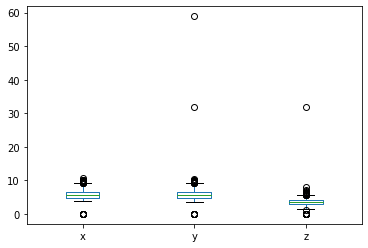

In [8]:
dia3.plot(kind = 'box')

# 문제3. 데이터 사전 처리

* 서울특별시 공공자전거 이용정보(월별)_201907_일부.xlsx   파일을 사용합니다
 (출처 : 서울시 열린데이터 광장)

아래 코드를 실행시켜주세요!

In [9]:
import pandas as pd

bicycle = pd.read_excel("서울특별시 공공자전거 이용정보(월별)_201907_일부.xlsx")
bicycle['대여소번호'] = bicycle['대여소번호'].astype('category')
bicycle['대여구분코드'] = bicycle['대여구분코드'].astype('category')
bicycle['연령대코드'] = bicycle['연령대코드'].astype('category')

bicycle.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0.00,0.00,0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.30,1280,6


#### (1) 연속변수 이동거리(M)를 

2개 구간에 할당하여 'bin_dividers' 리스트에 넣고

각 구간의 이름 (short/long)을 'bin_names' 리스트에 넣어 

이들을 활용해 이동거리(M)을 2개의 구간으로 나눈 'distance'에 저장하세요.

( include_lowest = True )로 지정

In [10]:
import numpy as np

count, bin_dividers = np.histogram(bicycle['이동거리(M)'],
                                  bins = 2)

bin_names = ['short','long']

bicycle['distance'] = pd.cut(bicycle['이동거리(M)'],
                 bins = bin_dividers,
                 labels = bin_names,
                 include_lowest = True)
bicycle[['이동거리(M)','distance']]

,이동거리(M),distance
0,7210,short
1,0,short
2,560190,long
3,12370,short
4,1280,short
5,3010,short
6,7040,short
7,13870,short
8,16280,short
9,750,short


#### (2) '대여구분코드'의 dummy 변수를 생성한 후, 기존의 데이터프레임과 연결(concat)하고 기존의 '대여구분코드'열을 제거해주세요.

In [11]:
대여구분코드_dummies = pd.get_dummies(bicycle['대여구분코드'])
bicycle = pd.concat([bicycle,대여구분코드_dummies], axis = 1)

In [12]:
bicycle.drop('대여구분코드', axis = 1, inplace = True)

In [13]:
bicycle

,대여일자,대여소번호,대여소,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),distance,일일(회원),정기
0,2019-07-01,3,중랑센터,M,AGE_003,6,199.86,1.68,7210,87,short,1,0
1,2019-07-01,3,중랑센터,M,AGE_004,1,0.00,0.00,0,2,short,1,0
2,2019-07-01,3,중랑센터,M,AGE_005,22,14419.28,129.96,560190,1329,long,1,0
3,2019-07-01,3,중랑센터,M,AGE_005,13,308.65,2.86,12370,155,short,0,1
4,2019-07-01,5,상암센터 정비실,M,AGE_005,1,34.47,0.30,1280,6,short,1,0
5,2019-07-01,7,7.이동정비,F,AGE_001,2,59.74,0.70,3010,18,short,0,1
6,2019-07-01,7,7.이동정비,F,AGE_002,3,204.27,1.63,7040,35,short,0,1
7,2019-07-01,7,7.이동정비,M,AGE_003,1,357.01,3.22,13870,62,short,0,1
8,2019-07-01,7,7.이동정비,F,AGE_004,6,507.17,3.78,16280,101,short,0,1
9,2019-07-01,7,7.이동정비,F,AGE_005,1,20.79,0.17,750,5,short,0,1


# 문제4. 데이터프레임 응용
* stock price 파일과 stock valuation 파일을 이용하는 문제입니다. 데이터를 불러와주세요

#### (1) 두 파일에는 공통으로 존재하는 주식 종목을 결합한 데이터프레임을 만들어주세요. 

id를 중심으로 결합된 데이터프레임(adf)를 만들어주세요

In [14]:
import numpy as np
import pandas as pd

df1 = pd.read_excel('stock price.xlsx')
df2 = pd.read_excel('stock valuation.xlsx')

In [15]:
df1

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


In [16]:
df2

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [17]:
adf = pd.merge(df1,df2, on = 'id')
adf

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


#### (2) adf 데이터프레임을 이용해 시가총액(value)이 10000 이상인 기업들의 주가(price), 주가수익비율(per), 주가자산비율(pbr)의 표준편차를 구하세요

In [18]:
adf[adf['value']>10000][['stock_name','price','per','pbr']].std()

price    80784.708743
per          5.329437
pbr          0.817878
dtype: float64

#### (3) adf 데이터프레임을 사용합니다.

주가수익비율(per)은 주가(price)에서 주당순이익(eps)을 나눠서 계산합니다.

예시) per = price/eps

 3-1) 기존의 per열은 삭제한 후 새롭게 per_new열을 price와 eps 를 사용해 추가해주세요

 3-2) per_new값이 15 이상인 기업은 고평가 15미만인 기업은 저평가를 나타내주는 per_value 열을 만들어주세요 (단, lambda와 apply를 사용해주세요)



In [19]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5 non-null      int64  
 1   stock_name  5 non-null      object 
 2   value       5 non-null      float64
 3   price       5 non-null      int64  
 4   name        5 non-null      object 
 5   eps         5 non-null      float64
 6   bps         5 non-null      int64  
 7   per         5 non-null      float64
 8   pbr         5 non-null      float64
dtypes: float64(4), int64(3), object(2)
memory usage: 400.0+ bytes


In [20]:
adf.drop(['per'], axis = 1, inplace = True)
adf['per_new'] = adf['price'] / adf['eps']

In [21]:
adf['per_value'] = adf['per_new'].apply(lambda x:'고평가' if x >=15 else '저평가')

In [22]:
adf

,id,stock_name,value,price,name,eps,bps,pbr,per_new,per_value
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,1.829178,15.695091,고평가
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,0.860437,13.931338,저평가
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,0.758627,14.283226,저평가
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,2.470259,25.185866,고평가
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,0.651359,40.802348,고평가
